In [224]:
import pandas as pd
import numpy as np
from scipy.stats import friedmanchisquare
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE

In [209]:
def get_y_labels(y):
        temp = np.unique(y)
        
        i = 0
        for val in temp:
            y[y==val] = i
            i += 1
        return np.array(y, dtype=int)

In [2]:
df_path = './data/input/yeast.data'
df = pd.read_csv(df_path, delim_whitespace=True)
df.head()

,sequence_name,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [3]:
df.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


/home/marcos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


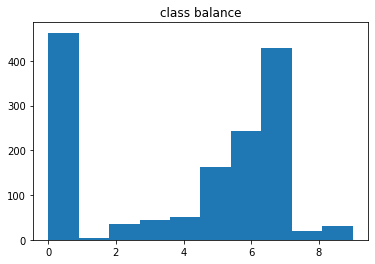

In [210]:
y = get_y_labels(df['class'])
plt.title('class balance')
_= plt.hist(y)

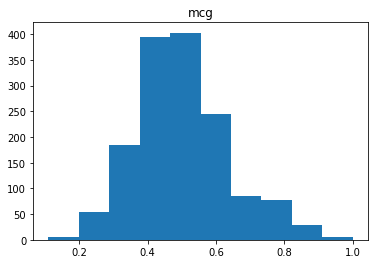

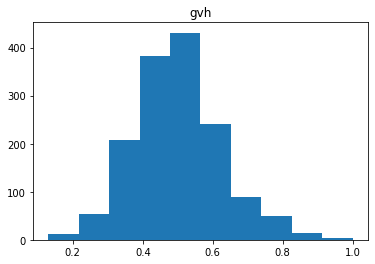

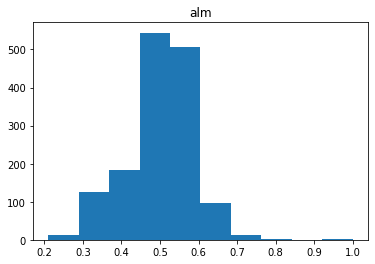

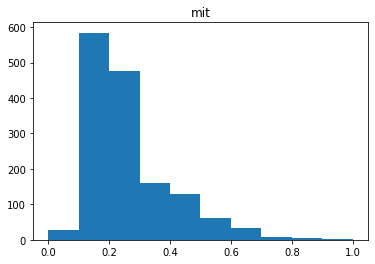

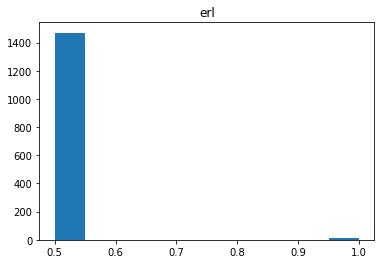

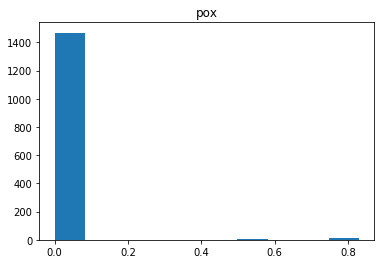

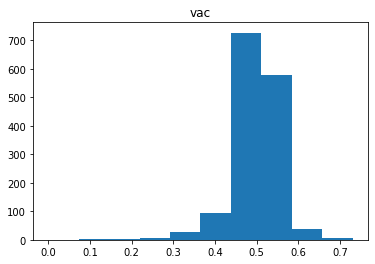

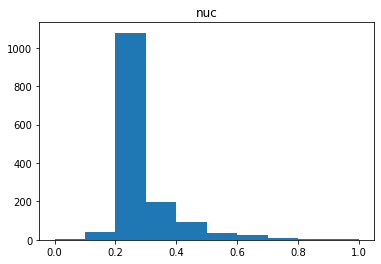

In [222]:
plt.title('mcg')
_= plt.hist(df['mcg'])
plt.show()

plt.title('gvh')
_= plt.hist(df['gvh'])
plt.show()

plt.title('alm')
_= plt.hist(df['alm'])
plt.show()

plt.title('mit')
_= plt.hist(df['mit'])
plt.show()

plt.title('erl')
_= plt.hist(df['erl'])
plt.show()

plt.title('pox')
_= plt.hist(df['pox'])
plt.show()

plt.title('vac')
_= plt.hist(df['vac'])
plt.show()

plt.title('nuc')
_= plt.hist(df['nuc'])
plt.show()

(1484, 8)
(4630, 8)


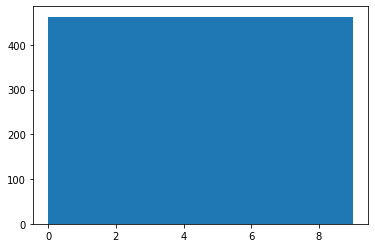

In [236]:
X = df.iloc[:, 1:-1]
print(X.shape)
X_new, y_new = get_oversampled_data(X, y)
print(X_new.shape)

_= plt.hist(y_new)

# Results Analysis

In [237]:
clustering_results_path = './data/output/clustering_results.csv'
clustering_results = pd.read_csv(clustering_results_path, sep=';')
clustering_results.head()

,mpc,p_entropy,cr,acc,f_measure
0,1.000000,0.000050,0.011632,0.289757,0.046900
1,0.999881,0.000226,0.002982,0.024933,0.005556
2,1.000000,0.000028,0.002980,0.013477,0.002685
3,0.999899,0.000270,0.008595,0.023585,0.004654
4,1.000000,0.000014,0.002980,0.024259,0.005781


In [265]:
# m = {1.1, 1.6, 2.0};

m1 = clustering_results.iloc[0:100, [0]].values
m2 = clustering_results.iloc[100:200, [0]].values
m3 = clustering_results.iloc[200:300, [0]].values

pd.DataFrame({
    'MPC (m=1.1)': m1.ravel(),
    'MPC (m=1.6)': m2.ravel(),
    'MPC (m=2.0)': m3.ravel()
}).describe()

,MPC (m=1.1),MPC (m=1.6),MPC (m=2.0)
count,100.000000,100.000000,100.000000
mean,0.993981,0.957169,0.951405
std,0.017853,0.115885,0.117852
min,0.900054,0.339813,0.511110
25%,0.999472,0.997256,0.990008
50%,1.000000,0.999804,0.998209
75%,1.000000,1.000000,0.999956
max,1.000000,1.000000,1.000000


In [266]:
# m = {1.1, 1.6, 2.0};

m1 = clustering_results.iloc[0:100, [1]].values
m2 = clustering_results.iloc[100:200, [1]].values
m3 = clustering_results.iloc[200:300, [1]].values

pd.DataFrame({
    'PE (m=1.1)': m1.ravel(),
    'PE (m=1.6)': m2.ravel(),
    'PE (m=2.0)': m3.ravel()
}).describe()

,PE (m=1.1),PE (m=1.6),PE (m=2.0)
count,1.000000e+02,1.000000e+02,1.000000e+02
mean,9.388324e-03,6.428793e-02,7.631151e-02
std,2.774241e-02,1.696796e-01,1.719051e-01
min,1.236375e-08,1.407474e-14,2.651796e-11
25%,1.611522e-05,1.069152e-06,1.041061e-04
50%,4.150377e-05,4.053279e-04,2.805545e-03
75%,8.261557e-04,5.679193e-03,2.295916e-02
max,1.479648e-01,1.035130e+00,6.945560e-01


In [269]:
# m = {1.1, 1.6, 2.0};

m1 = clustering_results.iloc[0:100, [2]].values
m2 = clustering_results.iloc[100:200, [2]].values
m3 = clustering_results.iloc[200:300, [2]].values

pd.DataFrame({
    'IRC (m=1.1)': m1.ravel(),
    'IRC (m=1.6)': m2.ravel(),
    'IRC (m=2.0)': m3.ravel()
}).describe()

,IRC (m=1.1),IRC (m=1.6),IRC (m=2.0)
count,100.000000,100.000000,100.000000
mean,0.008086,0.011955,0.010284
std,0.010038,0.014384,0.007058
min,-0.005273,-0.002199,-0.004375
25%,0.002980,0.003713,0.008557
50%,0.008545,0.011632,0.011615
75%,0.011632,0.011632,0.011632
max,0.075881,0.113643,0.057885


In [270]:
# m = {1.1, 1.6, 2.0};

m1 = clustering_results.iloc[0:100, [3]].values
m2 = clustering_results.iloc[100:200, [3]].values
m3 = clustering_results.iloc[200:300, [3]].values

pd.DataFrame({
    'F-Measure (m=1.1)': m1.ravel(),
    'F-Measure (m=1.6)': m2.ravel(),
    'F-Measure (m=2.0)': m3.ravel()
}).describe()

,F-Measure (m=1.1),F-Measure (m=1.6),F-Measure (m=2.0)
count,100.000000,100.000000,100.000000
mean,0.110195,0.098726,0.091678
std,0.108505,0.108695,0.103957
min,0.000000,0.000000,0.000000
25%,0.024090,0.020889,0.021395
50%,0.040094,0.032345,0.034030
75%,0.166611,0.164420,0.129043
max,0.312668,0.311321,0.318059


In [272]:
arry = [
[4.98954732e-001, 4.98833626e-001, 4.99937432e-001, 2.59247914e-001, 5.00000000e-001, 2.08973741e-145, 4.99493642e-001, 2.76899967e-001],
[7.76149673e-001, 7.33248676e-001, 4.11141969e-001, 2.73818943e-001, 5.00000000e-001, 2.83392710e-107, 5.22439091e-001, 2.20020492e-001],
[4.40003344e-001, 5.29995767e-001, 5.20001566e-001, 2.29993953e-001, 5.00000000e-001, 8.29999993e-001, 5.09999199e-001, 2.20000061e-001],
[5.02000000e-001, 4.96666667e-001, 5.11333333e-001, 2.53333333e-001, 5.00000000e-001, 7.42000000e-001, 5.08666667e-001, 2.37333333e-001],
[5.73722511e-001, 5.93120195e-001, 3.76120174e-001, 2.24092117e-001, 5.00000000e-001, 1.45772152e-056, 5.18729139e-001, 2.27972693e-001],
[5.91428571e-001, 5.77142857e-001, 4.92857143e-001, 2.52857143e-001, 1.00000000e+000, 2.38642601e-118, 5.25714286e-001, 2.79285714e-001],
[5.23599033e-001, 5.47891327e-001, 5.07443674e-001, 5.61873603e-001, 5.00000000e-001, 1.57918750e-108, 5.09171405e-001, 2.30861252e-001],
[6.11037679e-001, 5.84205298e-001, 4.93854037e-001, 2.18669158e-001, 5.00000000e-001, 4.01427581e-102, 5.10490138e-001, 2.28725708e-001],
[4.75058649e-001, 4.90149071e-001, 4.88930482e-001, 2.26901224e-001, 5.00000000e-001, 1.64607265e-119, 5.22498633e-001, 6.95924120e-001],
[6.49557492e-001, 6.12392117e-001, 4.93696050e-001, 2.14593813e-001, 5.00000000e-001, 9.38609304e-012, 5.13642933e-001, 2.23252792e-001]]

pd.DataFrame(arry)

,0,1,2,3,4,5,6,7
0,0.498955,0.498834,0.499937,0.259248,0.5,2.089737e-145,0.499494,0.276900
1,0.776150,0.733249,0.411142,0.273819,0.5,2.833927e-107,0.522439,0.220020
2,0.440003,0.529996,0.520002,0.229994,0.5,8.300000e-01,0.509999,0.220000
3,0.502000,0.496667,0.511333,0.253333,0.5,7.420000e-01,0.508667,0.237333
4,0.573723,0.593120,0.376120,0.224092,0.5,1.457722e-56,0.518729,0.227973
5,0.591429,0.577143,0.492857,0.252857,1.0,2.386426e-118,0.525714,0.279286
6,0.523599,0.547891,0.507444,0.561874,0.5,1.579188e-108,0.509171,0.230861
7,0.611038,0.584205,0.493854,0.218669,0.5,4.014276e-102,0.510490,0.228726
8,0.475059,0.490149,0.488930,0.226901,0.5,1.646073e-119,0.522499,0.695924
9,0.649557,0.612392,0.493696,0.214594,0.5,9.386093e-12,0.513643,0.223253


In [273]:
arry = [[0, 0, 0, 459, 0, 4, 0, 0, 0, 0],
 [0, 0, 0,   0, 0, 5, 0, 0, 0, 0],
 [0, 0, 0,  35, 0, 0, 0, 0, 0, 0],
 [0, 0, 0,  44, 0, 0, 0, 0, 0, 0],
 [0, 0, 0,  50, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 162, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 244, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 426, 0, 3, 0, 0, 0, 0],
 [0, 0, 0,  20, 0, 0, 0, 0, 0, 0],
 [0, 0, 0,  30, 0, 0, 0, 0, 0, 0]]
pd.DataFrame(arry)

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,459,0,4,0,0,0,0
1,0,0,0,0,0,5,0,0,0,0
2,0,0,0,35,0,0,0,0,0,0
3,0,0,0,44,0,0,0,0,0,0
4,0,0,0,50,0,1,0,0,0,0
5,0,0,0,162,0,1,0,0,0,0
6,0,0,0,244,0,0,0,0,0,0
7,0,0,0,426,0,3,0,0,0,0
8,0,0,0,20,0,0,0,0,0,0
9,0,0,0,30,0,0,0,0,0,0


In [67]:
results_path = './data/output/folds_results.csv'
results = pd.read_csv(results_path, sep=';')
results.head()

,fold,classifier,error_rate,f_measure,precision,recall
0,0,LR,0.478261,0.294292,0.339338,0.284480
1,0,PG,0.525084,0.495538,0.572028,0.561275
2,0,KNN,0.444816,0.567628,0.568587,0.600581
3,0,BG,0.688963,0.047449,0.031104,0.100000
4,0,ENSEMBLE,0.979933,0.010619,0.005660,0.085714


In [52]:
N=5
k=5

metrics = ['error_rate', 'f_measure', 'precision', 'recall']

# ------------
# Critical F
# with 5−1 = 4 and (5−1)×(5−1) = 16 degrees of freedom.
# The critical value of F(4,16) for α = 0.05 is 3.23887152
# ------------

F_critical = 3.23887152

test_results = {'metric': [], 'F_f': [], 'F_critical': [], 'result': []}

for i in metrics:
    ranks = np.zeros([5,1])
    
    test_results['metric'].append(i)
    test_results['F_critical'].append(F_critical)
        
    for j in range(0, N):
        ranks += results[results['fold'] == j].loc[:, [i]].rank().values

    avg_rank = ranks / N
    ranks_sum_square = np.sum(np.square(avg_rank))    

    # X^2_F = 12N/k(k+1) (sum_square(ranks) - (k(k+1)^2)/4)
    X2_F = ((12*N) / (k*(k+1))) * (ranks_sum_square - ((k*(k+1) ** 2) / 4))
    
    denominator = (N*(k-1)-X2_F)
    
    if denominator == 0:
        denominator = 1
    
    F_f = ((N-1)*X2_F) / denominator
    
    test_results['F_f'].append(F_f)
    
    if F_f > F_critical:
        test_results['result'].append('reject H0')
    else:
        test_results['result'].append('fail to reject H0')

pd.DataFrame(test_results)

,metric,F_f,F_critical,result
0,error_rate,21.316456,3.238872,reject H0
1,f_measure,80.000000,3.238872,reject H0
2,precision,79.333333,3.238872,reject H0
3,recall,37.666667,3.238872,reject H0


In [199]:
def get_plot():
    fig, ax = plt.subplots(figsize=(5,1.8))
    plt.subplots_adjust(left=0.2, right=0.8)

    # set up plot
    ax.set_xlim(limits)
    ax.set_ylim(0,1)
    ax.spines['top'].set_position(('axes', 0.6))
    #ax.xaxis.tick_top()
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_visible(False)
    for pos in ["bottom", "left", "right"]:
        ax.spines[pos].set_visible(False)
    
    return ax

def plot_cd_bar(ax, limits):
    ax.plot([limits[1], cd1], [0.97,0.97], color="k")
    ax.plot([limits[1], limits[1]], [0.97-0.03,0.97+0.03], color="k")
    ax.plot([cd1, cd1], [0.97-0.03,0.97+0.03], color="k") 
    ax.text(limits[1] + cd1/3., 1.02, "CD (0.05)", ha="center", va="bottom") 

    ax.plot([limits[1], cd2], [.83,.83], color="k")
    ax.plot([limits[1], limits[1]], [.83-0.03,.83+0.03], color="k")
    ax.plot([cd2, cd2], [.83-0.03,.83+0.03], color="k") 
    ax.text(limits[1] + cd2/3., 0.84, "CD (0.10)", ha="center", va="bottom") 
    
def get_kw():
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, va="center")
    
    return kw

In [169]:
# Table 5 (a)
qa_05 = 2.728
qa_10 = 2.459

# Error Rate

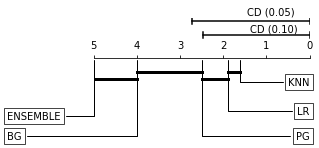

In [200]:
metric = 'error_rate'

N = 5
k = 5

ranks = np.zeros([5,1])
for j in range(0, N):
    ranks += results[results['fold'] == j].loc[:, [metric]].rank().values

avg_rank = ranks / N

LR = avg_rank[0][0]
PG = avg_rank[1][0]
KNN = avg_rank[2][0]
BG = avg_rank[3][0]
ENSEMBLE = avg_rank[4][0]

cd1 = qa_05 * np.sqrt((k*(k+1)) / (6*N))
cd2 = qa_10 * np.sqrt((k*(k+1)) / (6*N))

arr = avg_rank.ravel()
limits=(np.max(arr), .0)

ax = get_plot()

# CD bar
plot_cd_bar(ax, limits)

# annotations
kw = get_kw()

ax.annotate("KNN", xy=(KNN, 0.6), xytext=(1, 0.35),ha="right",  **kw)
ax.annotate("LR", xy=(LR, 0.6), xytext=(1, 0.05),ha="right",  **kw)
ax.annotate("PG", xy=(PG, 0.6), xytext=(1, -0.2),ha="right",  **kw)

ax.annotate("ENSEMBLE", xy=(ENSEMBLE, 0.6), xytext=(-0.4,0),ha="left",  **kw)
ax.annotate("BG", xy=(BG, 0.6), xytext=(-0.4,-0.2),ha="left",  **kw)

#bars
ax.plot([KNN,LR],[0.45,0.45], color="k", lw=3)
ax.plot([LR,PG],[0.38,0.38], color="k", lw=3)
ax.plot([PG,BG],[0.45,0.45], color="k", lw=3)
ax.plot([BG,ENSEMBLE],[0.38,0.38], color="k", lw=3)

plt.show()

# F-Measure

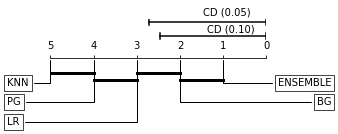

In [205]:
metric = 'f_measure'

N = 5
k = 5

ranks = np.zeros([5,1])
for j in range(0, N):
    ranks += results[results['fold'] == j].loc[:, [metric]].rank().values

avg_rank = ranks / N

LR = avg_rank[0][0]
PG = avg_rank[1][0]
KNN = avg_rank[2][0]
BG = avg_rank[3][0]
ENSEMBLE = avg_rank[4][0]

cd1 = qa_05 * np.sqrt((k*(k+1)) / (6*N))
cd2 = qa_10 * np.sqrt((k*(k+1)) / (6*N))

arr = avg_rank.ravel()
limits=(np.max(arr), .0)

ax = get_plot()

# CD bar
plot_cd_bar(ax, limits)

# annotations
kw = get_kw()

ax.annotate("ENSEMBLE", xy=(ENSEMBLE, 0.6), xytext=(1.3, 0.35),ha="right",  **kw)
ax.annotate("BG", xy=(BG, 0.6), xytext=(1.3, 0.15),ha="right",  **kw)

ax.annotate("KNN", xy=(KNN, 0.6), xytext=(-0.2, 0.35),ha="left",  **kw)
ax.annotate("PG", xy=(PG, 0.6), xytext=(-0.2, 0.15),ha="left",  **kw)
ax.annotate("LR", xy=(LR, 0.6), xytext=(-0.2, -0.05),ha="left",  **kw)


#bars
ax.plot([KNN,PG],[0.45,0.45], color="k", lw=3)
ax.plot([PG,LR],[0.38,0.38], color="k", lw=3)

ax.plot([LR,BG],[0.45,0.45], color="k", lw=3)
ax.plot([BG,ENSEMBLE],[0.38,0.38], color="k", lw=3)

plt.show()

# Precision

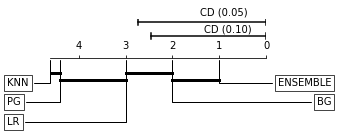

In [207]:
metric = 'precision'

N = 5
k = 5

ranks = np.zeros([5,1])
for j in range(0, N):
    ranks += results[results['fold'] == j].loc[:, [metric]].rank().values

avg_rank = ranks / N

LR = avg_rank[0][0]
PG = avg_rank[1][0]
KNN = avg_rank[2][0]
BG = avg_rank[3][0]
ENSEMBLE = avg_rank[4][0]

cd1 = qa_05 * np.sqrt((k*(k+1)) / (6*N))
cd2 = qa_10 * np.sqrt((k*(k+1)) / (6*N))

arr = avg_rank.ravel()
limits=(np.max(arr), .0)

ax = get_plot()

# CD bar
plot_cd_bar(ax, limits)

# annotations
kw = get_kw()

ax.annotate("ENSEMBLE", xy=(ENSEMBLE, 0.6), xytext=(1.3, 0.35),ha="right",  **kw)
ax.annotate("BG", xy=(BG, 0.6), xytext=(1.3, 0.15),ha="right",  **kw)

ax.annotate("KNN", xy=(KNN, 0.6), xytext=(-0.2, 0.35),ha="left",  **kw)
ax.annotate("PG", xy=(PG, 0.6), xytext=(-0.2, 0.15),ha="left",  **kw)
ax.annotate("LR", xy=(LR, 0.6), xytext=(-0.2, -0.05),ha="left",  **kw)


#bars
ax.plot([KNN,PG],[0.45,0.45], color="k", lw=3)
ax.plot([PG,LR],[0.38,0.38], color="k", lw=3)

ax.plot([LR,BG],[0.45,0.45], color="k", lw=3)
ax.plot([BG,ENSEMBLE],[0.38,0.38], color="k", lw=3)

plt.show()

# Recall

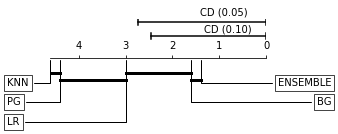

In [208]:
metric = 'recall'

N = 5
k = 5

ranks = np.zeros([5,1])
for j in range(0, N):
    ranks += results[results['fold'] == j].loc[:, [metric]].rank().values

avg_rank = ranks / N

LR = avg_rank[0][0]
PG = avg_rank[1][0]
KNN = avg_rank[2][0]
BG = avg_rank[3][0]
ENSEMBLE = avg_rank[4][0]

cd1 = qa_05 * np.sqrt((k*(k+1)) / (6*N))
cd2 = qa_10 * np.sqrt((k*(k+1)) / (6*N))

arr = avg_rank.ravel()
limits=(np.max(arr), .0)

ax = get_plot()

# CD bar
plot_cd_bar(ax, limits)

# annotations
kw = get_kw()

ax.annotate("ENSEMBLE", xy=(ENSEMBLE, 0.6), xytext=(1.3, 0.35),ha="right",  **kw)
ax.annotate("BG", xy=(BG, 0.6), xytext=(1.3, 0.15),ha="right",  **kw)

ax.annotate("KNN", xy=(KNN, 0.6), xytext=(-0.2, 0.35),ha="left",  **kw)
ax.annotate("PG", xy=(PG, 0.6), xytext=(-0.2, 0.15),ha="left",  **kw)
ax.annotate("LR", xy=(LR, 0.6), xytext=(-0.2, -0.05),ha="left",  **kw)


#bars
ax.plot([KNN,PG],[0.45,0.45], color="k", lw=3)
ax.plot([PG,LR],[0.38,0.38], color="k", lw=3)

ax.plot([LR,BG],[0.45,0.45], color="k", lw=3)
ax.plot([BG,ENSEMBLE],[0.38,0.38], color="k", lw=3)

plt.show()